# MATH7002 Advanced Statistical methods
## Worksheet 11

In [1]:
library(markovchain)

Loading required package: Matrix

Package:  markovchain
Version:  0.10.0
Date:     2024-11-14 00:00:02 UTC
BugReport: https://github.com/spedygiorgio/markovchain/issues




In [4]:
library(knitr)

In [5]:
b = matrix(c(0.38, 0.29, 0.22, 0.11, 0.25, 0.28, 0.25, 0.22, 0.21, 
0.26, 0.28, 0.25, 0.16, 0.17, 0.25, 0.42),4,4)
rownames(b) = c("Bottom", "2nd", "3rd", "Top")
colnames(b) = rownames(b)

1. The data below is a transition matrix estimated from Blanden, Gregg and Machin (2005) "Intergenerational mobility in Europe and North America". It shows the probabilities of a son being in each income quartile at age 30, for ech of the father's income quartiles when the son was 16.  

In [6]:
kable(b, caption="")



Table: 

|       | Bottom|  2nd|  3rd|  Top|
|:------|------:|----:|----:|----:|
|Bottom |   0.38| 0.25| 0.21| 0.16|
|2nd    |   0.29| 0.28| 0.26| 0.17|
|3rd    |   0.22| 0.25| 0.28| 0.25|
|Top    |   0.11| 0.22| 0.25| 0.42|

We assume this to be a Markov chain with the above transition matrix.

a. Plot as a graph

In [8]:
Bmc = as(b, "markovchain")
names(Bmc) = c("Bottom", "2nd", "3nd", "top")
show(Bmc)

Unnamed Markov chain 
 A  4 - dimensional discrete Markov Chain defined by the following states: 
 Bottom, 2nd, 3nd, top 
 The transition matrix  (by rows)  is defined as follows: 
       Bottom  2nd  3nd  top
Bottom   0.38 0.25 0.21 0.16
2nd      0.29 0.28 0.26 0.17
3nd      0.22 0.25 0.28 0.25
top      0.11 0.22 0.25 0.42



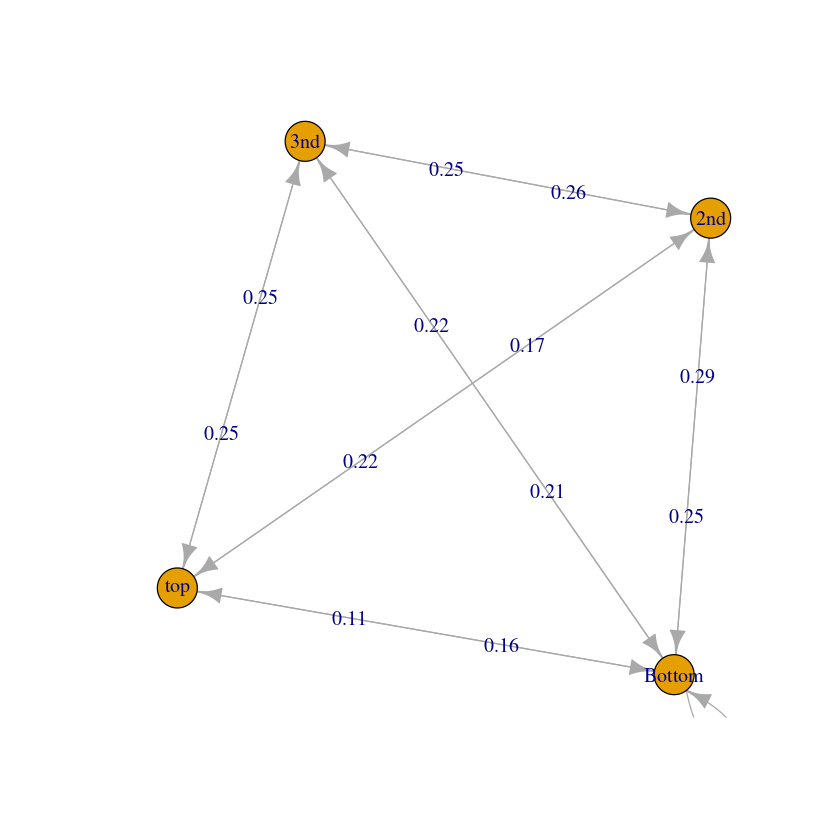

In [9]:
plot(Bmc)

b. For a father in the Bottom quartile, what is the probability that his great-grandson is in the Top income quartile? (3 generations)

In [10]:
# Three generations means we do the transition for three times 
p0 = c(1,0,0,0) # Because we need to multiply this one with the transition matrix 
p = p0*Bmc^3
print(p)
# Eg: The 0.258 under the Bottom means the his 3-rd generation is still lies in the Bottom, the probability is 0.25 

       Bottom      2nd      3nd      top
[1,] 0.258071 0.250891 0.248607 0.242431


c. Is this Markov chain irreducible?

In [11]:
is.irreducible(Bmc)

[1] TRUE

d. Write the "power method" in R to compute the stationary distribution. Verify using `steadyStates`.

In [14]:
# Because the stationary distribution is no related with the initial state 
x = runif(4) 
# Normalization 
x = x/sum(x)  
# Idea is: we times the Bmc for several times, and we stop at the iteration where the current one is as same as the previous one
repeat{
    y = x*Bmc
    if(all(y == x)) break
    x = y
}

In [15]:
print(x)

     Bottom  2nd  3nd  top
[1,]   0.25 0.25 0.25 0.25


e. What is the probability that a father in the Top income quartile first has a male decendant in the Bottom quartile after five generations?

In [17]:
fp = firstPassage(Bmc, state = "Bottom", n = 5)

In [18]:
# For example, the 0.16 lies in the first row in the top column means the probability of: father is rich, son is bottom
# But for the 0.1558, that means if a father is rich, after two generations, a first poor son appears! 

,Bottom,2nd,3nd,top
1,0.38000000,0.25000000,0.21000000,0.16000000
2,0.13630000,0.18270000,0.18480000,0.15580000
3,0.09961100,0.13641000,0.14392200,0.12997100
4,0.07800775,0.10310934,0.11020449,0.10564520
5,0.06198723,0.07830256,0.08400691,0.08554977


2. The transition matrix below is an example from lectures.

In [24]:
M = matrix(c(0, 1/3, 0, 2/3, 0,
             1/2, 0, 0, 0, 1/2,
             0, 0, 1/2, 1/2, 0,
             0, 0, 1/2, 1/2, 0,
             0, 0, 0, 0, 1), 5, 5, byrow=TRUE)
dimnames(M) = list(letters[1:5], letters[1:5])

a. Plot as a graph

In [25]:
Mmc = as(M, "markovchain")

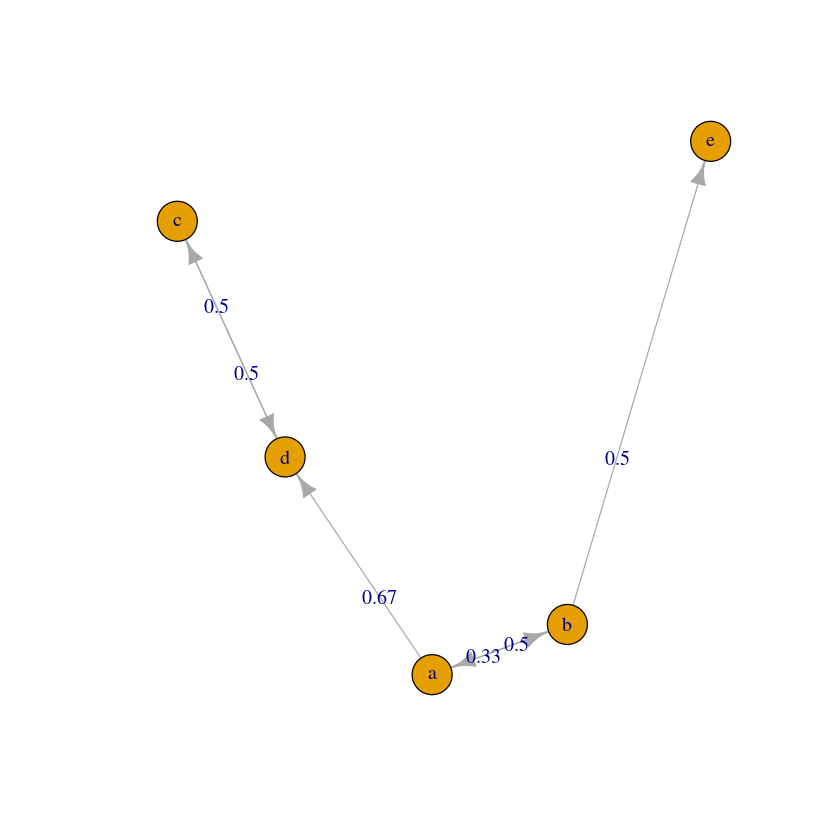

In [26]:
plot(Mmc)

In [27]:
is.irreducible(Mmc)

[1] FALSE

b. If starting in state a what is the probability of being in state c after 5 steps?

In [28]:
p0 = c(1,0,0,0,0)
p0*Mmc^5

a,b,c,d,e
0,0.009259259,0.3888889,0.4074074,0.1944444


c. If starting in state a, what is the probability that the first passage time to state e is 7?

In [29]:
firstPassage(Mmc, "a", 7)

,a,b,c,d,e
1,0.0000000,0.3333333,0.00000000,0.66666667,0.00000000
2,0.1666667,0.0000000,0.33333333,0.00000000,0.16666667
3,0.0000000,0.0000000,0.16666667,0.11111111,0.00000000
4,0.0000000,0.0000000,0.13888889,0.00000000,0.02777778
5,0.0000000,0.0000000,0.06944444,0.01851852,0.00000000
6,0.0000000,0.0000000,0.04398148,0.00000000,0.00462963
7,0.0000000,0.0000000,0.02199074,0.00308642,0.00000000


3. A gambler starts with \\$2. At each game he wins \\$1 with probability 0.1, and loses \\$1 with probability 0.9. If he ever gets to \\$0 or \\$5 he quits.

a. How many states are there?

In [33]:
p = 0.1 
P = matrix(c(1,0,0,0,0,0,
             1-p, 0, p, 0, 0, 0,
             0, 1-p, 0, p, 0, 0,
             0, 0, 1-p, 0, p, 0,
             0, 0, 0, 1-p, 0, p,
             0, 0, 0, 0, 0, 1), 6,6, byrow= TRUE)
print(P)

     [,1] [,2] [,3] [,4] [,5] [,6]
[1,]  1.0  0.0  0.0  0.0  0.0  0.0
[2,]  0.9  0.0  0.1  0.0  0.0  0.0
[3,]  0.0  0.9  0.0  0.1  0.0  0.0
[4,]  0.0  0.0  0.9  0.0  0.1  0.0
[5,]  0.0  0.0  0.0  0.9  0.0  0.1
[6,]  0.0  0.0  0.0  0.0  0.0  1.0


b. Build the transition matrix in R

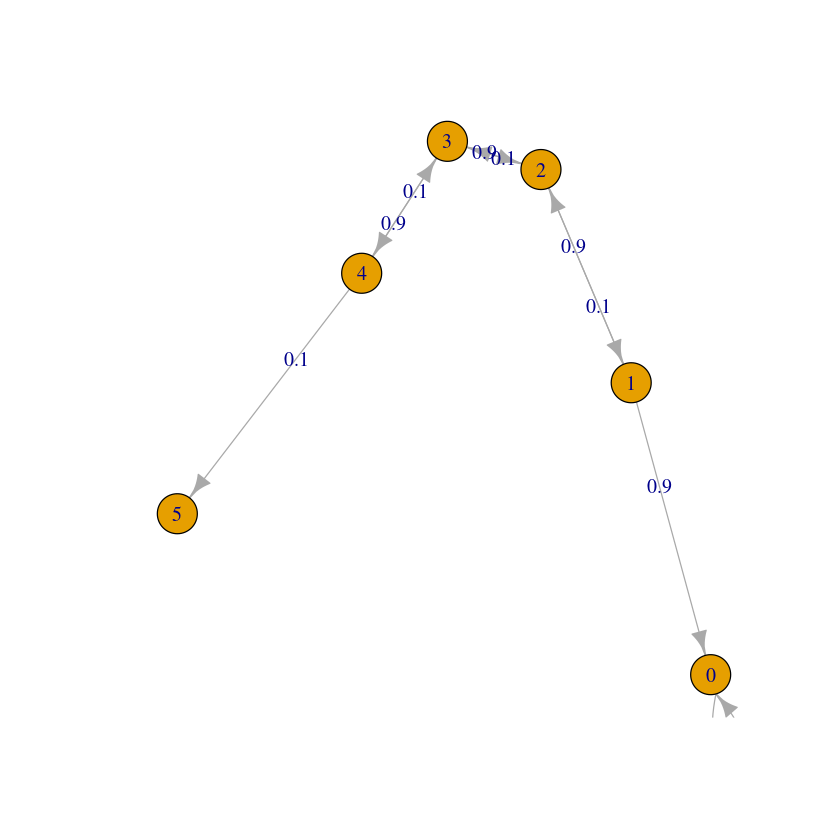

In [34]:
Pmc = as(P, "markovchain")
names(Pmc) = as.character(0:5)
plot(Pmc)

c. Plot as a graph

d. What is the probability he has lost all his money in 3 games or under?

In [35]:
firstPassage(Pmc, "2", 3)
# This 0.81 means after two games, the probability of losing all his money is 0.81

,0,1,2,3,4,5
1,0.00,0.900,0.00,0.100,0.00,0.000
2,0.81,0.000,0.18,0.000,0.01,0.000
3,0.00,0.081,0.00,0.009,0.00,0.001


In [36]:
# The only way he can lost all of his money within three games is losing the first and the second game 
P = 0.9*0.9

4. (Optional) A Gambler starts with \\$5. At each game he wins \\$1 with probability 0.1, and loses \\$1 with probability 0.9. If he ever gets to \\$0 or \\$10 he quits.

a. How many states are there?

In [38]:
p = 0.1 
p10 = matrix(0, 11, 11)
p10[1,1] = 1
p10[11,11] = 1
for (i in 2:10){
    p10[i, i -1] = 1- p 
    p10[i, i+1] = p
}

b. Build the transition matrix in R

c. Plot as a graph

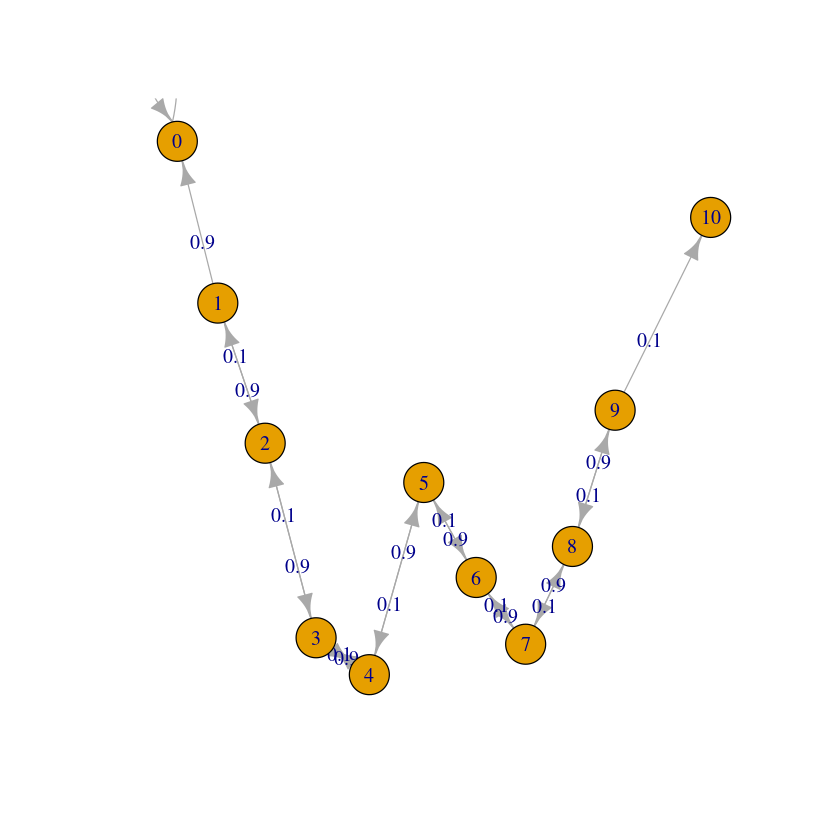

In [45]:
pmc = as(p10, "markovchain")
names(pmc) = as.character(0:10)
plot(pmc)